<a href="https://colab.research.google.com/github/Maxxx-VS/The-Founder/blob/master/39_4_Bert%3D%3D4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
# !pip install emoji==1.4.1
!pip install imblearn
!pip install --upgrade pandas

In [2]:
import numpy as np
import pandas as pd
import re, string
# import emoji
import nltk
from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from transformers import BertTokenizerFast
from transformers import TFBertModel
from transformers import RobertaTokenizerFast
from transformers import TFRobertaModel
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
seed=42
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.despine()
plt.style.use("Solarize_Light2")
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlepad=10)
import warnings
warnings.filterwarnings("ignore")

<Figure size 640x480 with 0 Axes>

In [3]:
df = pd.read_csv("/content/kaspi_reviews.csv", engine= 'python', encoding= 'utf-8')
df.columns

Index(['Unnamed: 0', 'text', 'plus', 'minus', 'language', 'rating',
       'category'],
      dtype='object')

In [4]:
df

,Unnamed: 0,text,plus,minus,language,rating,category
0,0,"Парфюм оригинальный. Всё, как в профессиональн...",NaN,NaN,russian,5.0,perfumes
1,1,Мой любимый DKNY. Запах просто шикарный. Спаси...,NaN,NaN,russian,5.0,perfumes
2,2,NaN,Шикарный запах! Безумно нравится! Не пожалеете...,NaN,russian,5.0,perfumes
3,3,NaN,Иісі қатты ұнады.,NaN,kazakh,5.0,perfumes
4,4,"Запах просто классный, как раз то, что мне нуж...","Мне все понравилось - и качество товара, и зап...","Единственное, что мне не понравилось, это то, ...",russian,4.0,perfumes
...,...,...,...,...,...,...,...
119043,119043,NaN,"Звук выше среднего, немного токсичные высокие ...","Нет aptx, немного тяжеловаты.",russian,5.0,headphones
119044,119044,"Вполне сносные наушники, но, думаю, не стоит с...",NaN,NaN,russian,4.0,headphones
119045,119045,Наушники просто супер,NaN,NaN,russian,5.0,headphones
119046,119046,NaN,Всё супер,Басов маловато,russian,4.0,headphones


In [5]:
# Перемешаем датасет
df = df.sample(frac=1).reset_index(drop=True)

In [6]:
df

,Unnamed: 0,text,plus,minus,language,rating,category
0,47522,NaN,Неплохой смартфоны за такие деньги. Говорят Re...,NaN,russian,5.0,smartphones
1,63584,NaN,Все ок.,Долгое ожидание книги на кассе - 20-30 минут.,russian,5.0,books
2,96552,Можно же уже принять какие-нибудь меры по пони...,Большой,"Шумный, мой старый тише. Думаю, может сдать об...",russian,3.0,big-home-appl
3,50237,NaN,"Товар отличный, снимки чистые, в общем, совету...",NaN,russian,5.0,car-electronics
4,23188,NaN,Телефон хорош. <br>\nПользуюсь месяц. Быстроде...,Не понравился чехол в коробке. Заказал новый. ...,russian,4.0,smartphones
...,...,...,...,...,...,...,...
119043,109147,Хорошо!,NaN,NaN,russian,5.0,climate-equipment
119044,75536,"после каждой уборки поражаюсь, как же грязная...","удобен как в использовании, так и в эксплуатац...",немного дороговат конечно. перекручивается шла...,russian,4.0,small-home-appl
119045,15628,NaN,Отлично,NaN,russian,5.0,smartphones
119046,20371,NaN,"Телефон отличный. Супер, все устраивает",NaN,russian,5.0,smartphones


In [7]:
# Удаляем строки с казахским языком
df = df.drop(df[df['language'] == "kazakh"].index)

In [8]:
# Удаляем лишние столбцы
df = df.drop(['Unnamed: 0', 'plus', 'minus', 'language', 'rating'], axis=1)

In [9]:
# Удаляем все строки с пропущенными значениями
df = df.dropna()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55938 entries, 2 to 119047
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      55938 non-null  object
 1   category  55938 non-null  object
dtypes: object(2)
memory usage: 1.3+ MB


In [11]:
df['category'].unique()

array(['big-home-appl', 'smartphones', 'power-banks', 'beauty',
       'kitchen-home-appl', 'car-electronics', 'climate-equipment',
       'small-home-appl', 'headphones', 'books', 'tires', 'car-audio',
       'perfumes', 'wearables', 'watches', 'memory-cards',
       'portable-speakers'], dtype=object)

In [12]:
df['category'].value_counts()

,count
category,
smartphones,21497
kitchen-home-appl,5961
small-home-appl,5803
big-home-appl,5556
beauty,3076
headphones,3076
climate-equipment,2451
tires,1890
car-electronics,1833


In [13]:
def conf_matrix(y, y_pred, title):
    fig, ax =plt.subplots(figsize=(15,15))
    labels = ['big-home-appl', 'perfumes', 'smartphones', 'climate-equipment',
       'power-banks', 'small-home-appl', 'beauty', 'headphones',
       'memory-cards', 'kitchen-home-appl', 'car-electronics', 'tires',
       'watches', 'wearables', 'car-audio', 'portable-speakers', 'books']

    ax=sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap="Blues", fmt='g', cbar=False, annot_kws={"size":25})
    plt.title(title, fontsize=20)
    ax.xaxis.set_ticklabels(labels, fontsize=7)
    ax.yaxis.set_ticklabels(labels, fontsize=7)
    ax.set_ylabel('Тест', fontsize=20)
    ax.set_xlabel('Предсказание', fontsize=20)
    plt.show()

In [14]:
df

,text,category
2,Можно же уже принять какие-нибудь меры по пони...,big-home-appl
5,Телефон огонь. Всё соответствует. Советую брать,smartphones
6,Советую всем. Нужная вещь. Доставили быстро. В...,power-banks
7,Ооочень долго выбирала себе крутящуюся фен-щет...,beauty
9,"Покупкой доволен, все соответствует описанию и...",big-home-appl
...,...,...
119040,Хорошая модель.,kitchen-home-appl
119042,Просто супер! Шикарный холодильник!,big-home-appl
119043,Хорошо!,climate-equipment
119044,"после каждой уборки поражаюсь, как же грязная...",small-home-appl


In [15]:
df_train = df[:40000]
df_test = df[40001:]

In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40000 entries, 2 to 85269
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      40000 non-null  object
 1   category  40000 non-null  object
dtypes: object(2)
memory usage: 937.5+ KB


In [17]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15937 entries, 85272 to 119047
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      15937 non-null  object
 1   category  15937 non-null  object
dtypes: object(2)
memory usage: 373.5+ KB


In [18]:
# def strip_emoji(text):
#     return re.sub(emoji.get_emoji_regexp(), r"", text) #удаляем emoji (смайлики)

# # Удаляем пунктуацию, ссылки, упоминание других участников, символы конца строки и переноса \r\n
# def strip_all_entities(text):
#     text = text.replace('\r', '').replace('\n', ' ').replace('\n', ' ').lower() # удаляем \n и \r и переводим строку в нижний регистр
#     text = re.sub(r"(?:\@|https?\://)\S+", "", text) # удаление ссылок и упоминаний других участников
#     text = re.sub(r'[^\x00-\x7f]',r'', text) # удаление символов не utf8/ascii, таких как '\x9a\x91\x97\x9a\x97'
#     banned_list= string.punctuation + 'Ã'+'±'+'ã'+'¼'+'â'+'»'+'§' # символы для удаления, включая пунктуацию
#     table = str.maketrans('', '', banned_list) # создание словаря замены
#     text = text.translate(table) # применение к строке словаря замены
#     return text

# # убираем хэштеги в конце предложения и оставляем в середине, удалив только символ #
# def clean_hashtags(tweet):
#     new_tweet = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet)) # удаление последнего хэштега
#     new_tweet2 = " ".join(word.strip() for word in re.split('#|_', new_tweet)) # удаление символа хэштега в середине предложения
#     return new_tweet2

# # Фильтрация специальных символов, таких как & и $, присутствующих в некоторых словах
# def filter_chars(a):
#     sent = []
#     for word in a.split(' '):
#         if ('$' in word) | ('&' in word):
#             sent.append('')
#         else:
#             sent.append(word)
#     return ' '.join(sent)

# def remove_mult_spaces(text): # удаление множественных пробелов с помощью регулярки
#     return re.sub("\s\s+" , " ", text)

In [19]:
texts_new = []
for t in df_train.text:
    texts_new.append(t)

In [20]:
texts_new_test = []
for t in df_test.text:
    texts_new_test.append(t)

In [21]:
# texts_new = []
# for t in df_train.text:
#     texts_new.append(remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(strip_emoji(t))))))

In [22]:
# texts_new_test = []
# for t in df_test.text:
#     texts_new_test.append(remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(strip_emoji(t))))))

In [23]:
df_train['text_clean'] = texts_new
df_test['text_clean'] = texts_new_test

In [24]:
df_train['text_clean'].head(3)

,text_clean
2,Можно же уже принять какие-нибудь меры по пони...
5,Телефон огонь. Всё соответствует. Советую брать
6,Советую всем. Нужная вещь. Доставили быстро. В...


In [25]:
df_test['text_clean'].head(3)

,text_clean
85272,"Покупали телефон ребёнку на день рождения, все..."
85276,"Очень хорошая печка, мне понравилось"
85280,"Покупали свекрови, она в восторге!"


In [26]:
text_len = []
for text in df_train.text_clean:
    tweet_len = len(text.split())
    text_len.append(tweet_len)

df_train['text_len'] = text_len

In [27]:
text_len_test = []
for text in df_test.text_clean:
    tweet_len = len(text.split())
    text_len_test.append(tweet_len)

df_test['text_len'] = text_len_test

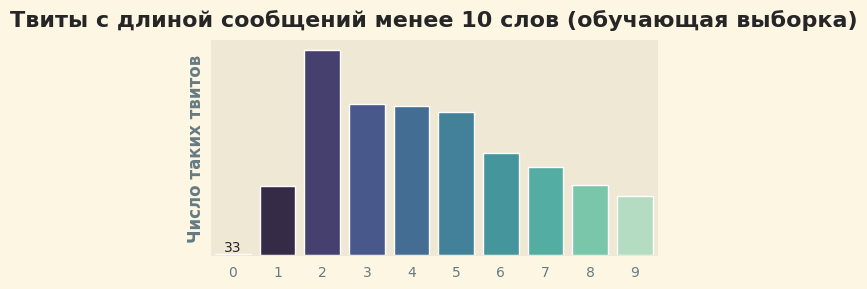

In [28]:
plt.figure(figsize=(5,3))
ax = sns.countplot(x='text_len', data=df_train[df_train['text_len']<10], palette='mako')
plt.title('Твиты с длиной сообщений менее 10 слов (обучающая выборка)')
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('Число таких твитов')
plt.xlabel('')
plt.show()

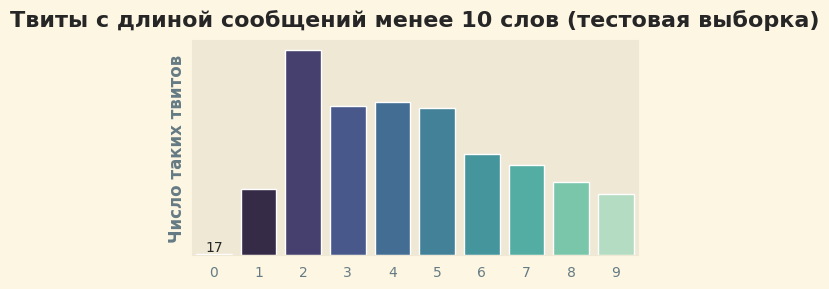

In [29]:
plt.figure(figsize=(5,3))
ax = sns.countplot(x='text_len', data=df_test[df_test['text_len']<10], palette='mako')
plt.title('Твиты с длиной сообщений менее 10 слов (тестовая выборка)')
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('Число таких твитов')
plt.xlabel('')
plt.show()

In [30]:
print(f"Форма обучающей выборки: {df_train.shape}")
print(f"Форма тестовой выборки: {df_test.shape}")

Форма обучающей выборки: (40000, 4)
Форма тестовой выборки: (15937, 4)


In [31]:
df_train = df_train[df_train['text_len'] > 0]
df_test = df_test[df_test['text_len'] > 0]

In [32]:
print(f"Форма обучающей выборки после очистки: {df_train.shape}")
print(f"Форма тестовой выборки после очистки: {df_test.shape}")

Форма обучающей выборки после очистки: (39967, 4)
Форма тестовой выборки после очистки: (15920, 4)


In [33]:
tokenizer = BertTokenizerFast.from_pretrained('seara/rubert-tiny2-russian-sentiment')

tokenizer_config.json:   0%|          | 0.00/368 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.41M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [34]:
token_lens = []

for txt in df_train['text_clean'].values:
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens.append(len(tokens))

max_len=np.max(token_lens)
print(f"Максимальная длина токенизированной последовательности: {max_len}")

Максимальная длина токенизированной последовательности: 512


In [35]:
token_lens = []

for i,txt in enumerate(df_train['text_clean'].values):
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens.append(len(tokens))
    if len(tokens)>80:
        print(f"INDEX: {i}, TEXT: {txt}")

INDEX: 3, TEXT: Ооочень долго выбирала себе крутящуюся фен-щетку,т.к подстригла волосы чуть выше плеч и от ежедневных укладок обычным феном и круглой расчески  сильно уставали руки.<br>Хочу сказать,что укладка этой фен-щеткой -сплошное удовольствие! Очень просто! Очень быстро! И даже приятно! )) Рука не устает вообще ! Ставлю на режим Care и ТЁПЛЫМ воздухом ,совершенно не повреждая волосы делаю укладку.<br>НО! Эта щетка настолько ИДЕАЛЬНО разглаживает и полирует волосы,что объема нет вообще (( Волосинка к волосинке ! Блеск волос потрясающий ! НО  прическа уныло висящая и от объема не следа (( Пробовала и у корней подольше держать и средствами для укладки пользовалась и даже увеличивала температуру сушки ... эффект тот же самый (((<br>Буду экспериментировать дальше.Вдруг все так достигну эффекта ради которого покупала этот фен ))
INDEX: 10, TEXT: Аппарат хороший, такой же хороший, как и предыдущие айфоны. Это не новый телефон, это всё тот же айфон 6+, в который засунули н

In [36]:
df_train['token_lens'] = token_lens

In [37]:
df_train = df_train.sort_values(by='token_lens', ascending=False)
df_train.head(3)

,text,category,text_clean,text_len,token_lens
69622,Общее впечатление - машинка восхитительна! <br...,big-home-appl,Общее впечатление - машинка восхитительна! <br...,312,512
43248,"Много написано уже, буду краток!<br>Смарт купл...",smartphones,"Много написано уже, буду краток!<br>Смарт купл...",288,512
32254,Два года назад (в сентябре 2014) мне подарили ...,headphones,Два года назад (в сентябре 2014) мне подарили ...,286,512


In [38]:
# df_train = df_train.sample(frac=1).reset_index(drop=True)

In [39]:
token_lens_test = []

for txt in df_test['text_clean'].values:
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens_test.append(len(tokens))

max_len=np.max(token_lens_test)
print(f"Максимальная длина токенизированной последовательности: {max_len}")

Максимальная длина токенизированной последовательности: 512


In [40]:
token_lens_test = []

for i,txt in enumerate(df_test['text_clean'].values):
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens_test.append(len(tokens))
    if len(tokens)>80:
        print(f"INDEX: {i}, TEXT: {txt}")

INDEX: 9, TEXT: Не смотря на все минусы - пылик мировой. У меня он уже около 2,5 лет пашет, как раб. Пользую и дома и для чистки автомобилей. Первый тест - драйв прошел дома при чистке всех ковров (ковры не чистились после ремонта года два, в квартире никто не жил, потом еще пол года при мне и моей собаке). Из пыльных, затоптанных валенков превратились в яркие и пушистые. Ворс на протоптанных местах вздыбился. Пылесосить ковры напряжно, так как прилипает ацке. Переключала щетку в режим &quot;паркет&quot; и тогда можно более - менее нормально возюкать по ковру. Пол в том же режиме, иначе присасывается. Шерсть с ковров собрал на ура (короткую, впивающуюся везде и вся, как иголки), 500 раз по одному месту елозить не пришлось. Грязные ковры (не коврики под ногами, а все покрытие пола автомобиля) в машинах вычищает до салонного блеска. Тканевые салоны - цвет оживляется. Песок, грязь, грязь с водой (иногда в коврах бывает влага) собирает идеально. После чистки автомобиль перестает воня

In [41]:
df_test['token_lens'] = token_lens_test

In [42]:
df_test = df_test.sort_values(by='token_lens', ascending=False)
df_test.head(3)

,text,category,text_clean,text_len,token_lens
96369,Привет!<br><br>Вот уже с месяц пользуюсь http:...,beauty,Привет!<br><br>Вот уже с месяц пользуюсь http:...,267,512
96401,"Много написано уже, буду краток!<br>Смарт купл...",smartphones,"Много написано уже, буду краток!<br>Смарт купл...",288,512
96017,"Нюансы, которые могут кому-то не понравиться:<...",kitchen-home-appl,"Нюансы, которые могут кому-то не понравиться:<...",284,512


In [43]:
# df_test = df_test.sample(frac=1).reset_index(drop=True)

In [44]:
df_train['category'].value_counts()

,count
category,
smartphones,15383
kitchen-home-appl,4272
small-home-appl,4134
big-home-appl,3959
beauty,2214
headphones,2192
climate-equipment,1739
tires,1348
car-electronics,1314


In [45]:
df_train['category'] = df_train['category'].map({'big-home-appl':0, 'perfumes':1, 'smartphones':2, 'climate-equipment':3,
       'power-banks':4, 'small-home-appl':5, 'beauty':6, 'headphones':7,
       'memory-cards':8, 'kitchen-home-appl':9, 'car-electronics':10, 'tires':11,
       'watches':12, 'wearables':13, 'car-audio':14, 'portable-speakers':15, 'books':16})

df_test['category'] = df_test['category'].map({'big-home-appl':0, 'perfumes':1, 'smartphones':2, 'climate-equipment':3,
       'power-banks':4, 'small-home-appl':5, 'beauty':6, 'headphones':7,
       'memory-cards':8, 'kitchen-home-appl':9, 'car-electronics':10, 'tires':11,
       'watches':12, 'wearables':13, 'car-audio':14, 'portable-speakers':15, 'books':16})

In [46]:
df_train['category'].value_counts()

,count
category,
2,15383
9,4272
5,4134
0,3959
6,2214
7,2192
3,1739
11,1348
10,1314


In [47]:
df_test['category'].value_counts()

,count
category,
2,6097
9,1686
5,1666
0,1586
7,879
6,862
3,709
11,538
10,518


In [48]:
ros = RandomOverSampler()
train_x, train_y = ros.fit_resample(np.array(df_train['text_clean']).reshape(-1, 1), np.array(df_train['category']).reshape(-1, 1));
train_os = pd.DataFrame(list(zip([x[0] for x in train_x], train_y)), columns = ['text_clean', 'category']);

In [49]:
train_os['category'].value_counts()

,count
category,
0,15383
2,15383
7,15383
10,15383
9,15383
3,15383
5,15383
6,15383
14,15383


In [50]:
X = train_os['text_clean'].values
y = train_os['category'].values

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, stratify=y, random_state=seed)

X_test = df_test['text_clean'].values
y_test = df_test['category'].values

y_train_le = y_train.copy()
y_valid_le = y_valid.copy()
y_test_le = y_test.copy()

In [51]:
print(y_train.shape)
print(y_valid.shape)

(235359,)
(26152,)


In [52]:
ohe = preprocessing.OneHotEncoder()

y_train = ohe.fit_transform(np.array(y_train).reshape(-1, 1)).toarray()
y_valid = ohe.fit_transform(np.array(y_valid).reshape(-1, 1)).toarray()
y_test = ohe.fit_transform(np.array(y_test).reshape(-1, 1)).toarray()

In [53]:
print(y_train.shape)
print(y_valid.shape)

(235359, 17)
(26152, 17)


In [54]:
print(f"Тренировочная выборка: {X_train.shape[0]}")
print(f"Проверочная выборка: {X_valid.shape[0]}")
print(f"Тестовая выборка: {X_test.shape[0]}")

Тренировочная выборка: 235359
Проверочная выборка: 26152
Тестовая выборка: 15920


In [55]:
# Токенизатор
def tokenize(data, max_len=128):
    input_ids = []
    attention_masks = []

    for text in data:
        encoded = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=max_len,
            padding='max_length',
            truncation=True,
            return_tensors="pt"
        )
        input_ids.append(encoded['input_ids'].squeeze().tolist())
        attention_masks.append(encoded['attention_mask'].squeeze().tolist())

    return np.array(input_ids, dtype=np.int32), np.array(attention_masks, dtype=np.int32)

In [56]:
print(X_train.shape)
print(X_train.dtype)

(235359,)
object


In [57]:
train_input_ids, train_attention_masks = tokenize(X_train)
val_input_ids, val_attention_masks = tokenize(X_valid)
test_input_ids, test_attention_masks = tokenize(X_test)

In [58]:
bert_model = TFBertModel.from_pretrained('seara/rubert-tiny2-russian-sentiment')

config.json:   0%|          | 0.00/911 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/117M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['classifier.weight', 'classifier.bias', 'bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [59]:
def create_model(bert_model, max_len=128):

    opt = tf.keras.optimizers.legacy.Adam(learning_rate=1e-5, decay=1e-7) # оптимизатор - Adam
    loss = tf.keras.losses.CategoricalCrossentropy()                      # функция потерь - категориальная кросс-энтропия
    accuracy = tf.keras.metrics.CategoricalAccuracy()                     # метрика - категориальная точность
    input_ids = tf.keras.Input(shape=(max_len,), dtype='int32')         # вход для токенизированной последовательности
    attention_masks = tf.keras.Input(shape=(max_len,), dtype='int32')   # маска
    embeddings = bert_model([input_ids, attention_masks])[1]            # BERT-модель
    output = tf.keras.layers.Dense(17, activation="softmax")(embeddings) # полносвязный слой для классификации OHE (3 нейрона - 3 класса)
    model = tf.keras.models.Model(inputs = [input_ids, attention_masks], outputs = output)
    model.compile(opt, loss=loss, metrics=accuracy)

    return model

In [60]:
model = create_model(bert_model)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128)]                0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 128)]                0         []                            
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   2919376   ['input_1[0][0]',             
 )                           ngAndCrossAttentions(last_   8          'input_2[0][0]']             
                             hidden_state=(None, 128, 3                                           
                             12),                                                             

In [61]:
print(train_input_ids.shape)
print(train_attention_masks.shape)
print(y_train.shape)
print(y_valid.shape)

(235359, 128)
(235359, 128)
(235359, 17)
(26152, 17)


In [62]:
history_bert = model.fit([train_input_ids,
                        train_attention_masks],
                        y_train,
                        validation_data=([val_input_ids, val_attention_masks],
                        y_valid),
                        epochs=3, batch_size=32)

Epoch 1/3
7355/7355 [==============================] - 542s 73ms/step - loss: 1.4889 - categorical_accuracy: 0.5567 - val_loss: 0.9653 - val_categorical_accuracy: 0.7031
Epoch 2/3
7355/7355 [==============================] - 530s 72ms/step - loss: 0.9029 - categorical_accuracy: 0.7218 - val_loss: 0.7104 - val_categorical_accuracy: 0.7764
Epoch 3/3
7355/7355 [==============================] - 531s 72ms/step - loss: 0.7159 - categorical_accuracy: 0.7763 - val_loss: 0.5927 - val_categorical_accuracy: 0.8111


In [79]:
result_bert = model.predict([test_input_ids, test_attention_masks])

498/498 [==============================] - 11s 22ms/step


In [64]:
y_pred_bert =  np.zeros_like(result_bert)
y_pred_bert[np.arange(len(y_pred_bert)), result_bert.argmax(1)] = 1

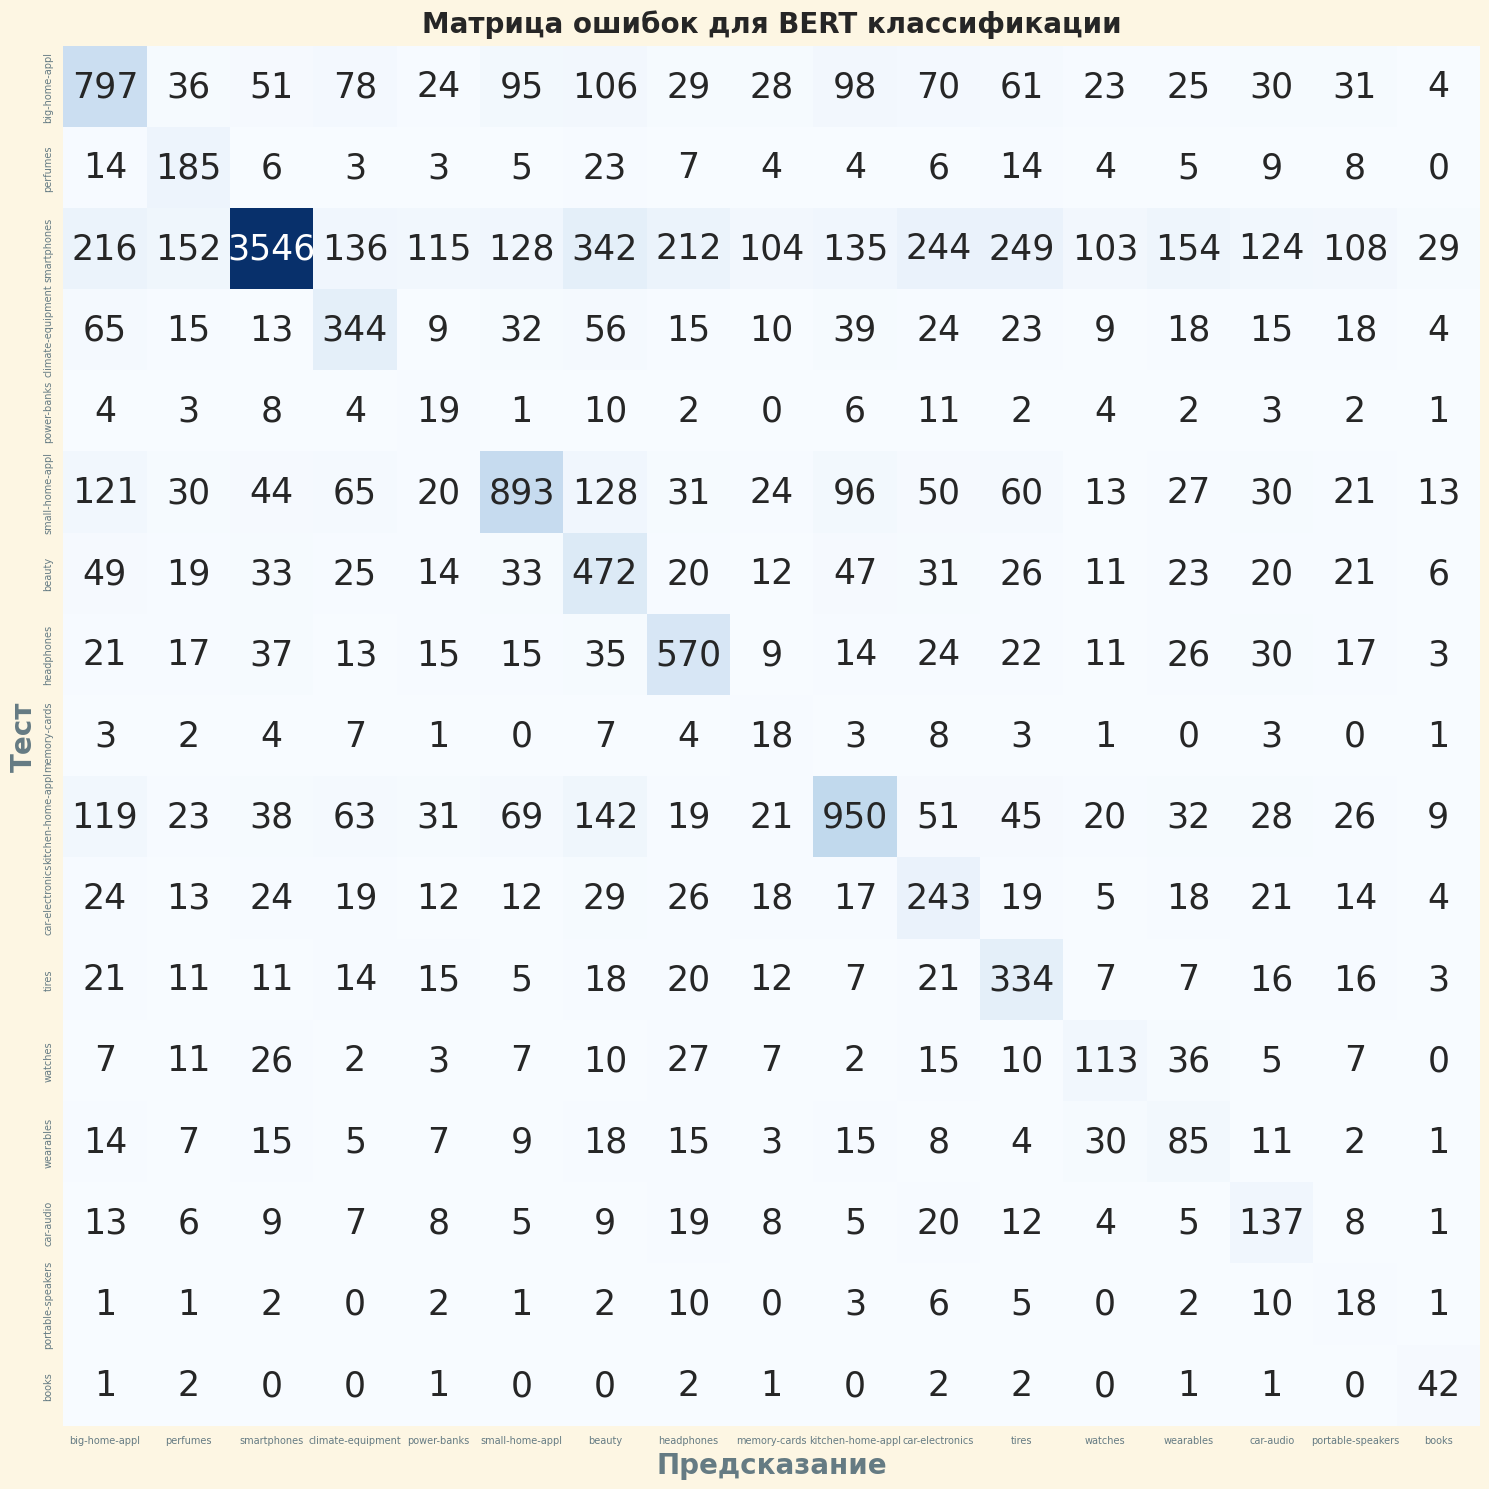

In [65]:
conf_matrix(y_test.argmax(1), y_pred_bert.argmax(1),'Матрица ошибок для BERT классификации')

In [66]:
print('Расчет метрик для BERT классификатора:', '/n')
print(classification_report(y_test, y_pred_bert, target_names=['big-home-appl', 'perfumes', 'smartphones', 'climate-equipment',
       'power-banks', 'small-home-appl', 'beauty', 'headphones',
       'memory-cards', 'kitchen-home-appl', 'car-electronics', 'tires',
       'watches', 'wearables', 'car-audio', 'portable-speakers', 'books']))

Расчет метрик для BERT классификатора: /n
                   precision    recall  f1-score   support

    big-home-appl       0.53      0.50      0.52      1586
         perfumes       0.35      0.62      0.44       300
      smartphones       0.92      0.58      0.71      6097
climate-equipment       0.44      0.49      0.46       709
      power-banks       0.06      0.23      0.10        82
  small-home-appl       0.68      0.54      0.60      1666
           beauty       0.34      0.55      0.42       862
       headphones       0.55      0.65      0.60       879
     memory-cards       0.06      0.28      0.10        65
kitchen-home-appl       0.66      0.56      0.61      1686
  car-electronics       0.29      0.47      0.36       518
            tires       0.37      0.62      0.47       538
          watches       0.32      0.39      0.35       288
        wearables       0.18      0.34      0.24       249
        car-audio       0.28      0.50      0.36       276
portable-spea

In [89]:
print(X_test[0])

Привет!<br><br>Вот уже с месяц пользуюсь http:&#x2F;&#x2F;market.yandex.ru&#x2F;model.xml?modelid=974060<br>сбривает волосы под ноль или почти под ноль без раздражения и к вечеру у тебя легкая щетина.<br>Это Panasonic ES-6003 взял за 1360 руб. <br><br>Не так давно решил побриться Т-станком, в итоге все шея в микро порезах и раздражение. <br>Больше станок пока трогать не хочу.<br>Бреюсь на сухую, какой кайф не надо готовить щетину - распаривать ее, замачивать помазок, пену взбивать, А ВЗЯЛ И ПОБРИЛСЯ!!!<br>2 минуты делов, хоть стоя уже в куртке на пороге :)<br><br>Бритву взял почти самую дешевую. Скажу так хватает 1 заряда на раз 7-10 побриться, прошло уже наверное недели 2 как заряжал, <br>бреет до сих пор. <br>Брать более дорогую с плавающей головкой - не вижу смысла. У моей лезвия плавают, а голова нет.<br>Если и стоит брать дороже, то ту, которая с Li-on аккумулятором, заряжать удобнее и моя от сети не работает.<br>Сетки народ говорит хватает на пару лет легко, сетка стоит с но

In [96]:
predictions = model.predict(X_test[0],)
print(predictions)

IndexError: tuple index out of range